# Air Quality Prediction [Challange]
👨‍💻 **Arjun Adhikari**, June 30, 2019

Importing the required libraries.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Function for reading filename and returning dataframe values.

In [2]:
def readData(fileName):
    
    df=pd.read_csv(fileName)
    return df.values

In [3]:
data=readData('Train.csv')
print(type(data))

<type 'numpy.ndarray'>


In [4]:
print(data.shape)

(1600, 6)


In [5]:
X=data[:,:5]
Y=data[:,5]
print(X.shape)
print(Y.shape)

(1600, 5)
(1600,)


In [6]:
ones = np.ones([X.shape[0],1])
X = np.concatenate((ones,X),axis=1)

## Algorithm

### Hypothesis Function

In [7]:
def hypothesis(theta,x):
    
    m=x.shape[0]
    sum=0
    
    for i in range(m):
        sum+=(theta[i]*x[i])
        
    return sum

### Error Function

In [8]:
def error(theta,X,Y):
    
    m=X.shape[0]
    total_error=0
    
    for i in range(m):
        
        hx = hypothesis(theta,X[i])
        total_error+=((hx - Y[i])**2)
        
    return 0.5*total_error

### Gradient Function

In [9]:
def gradient(theta,X,Y):
    
    m=X.shape[0]
    n=X.shape[1]
    
    grad=np.zeros((n,))
    
    for i in range(n):
        
        for j in range(m):
            grad[i]+=((hypothesis(theta,X[j])-Y[j])*X[j][i])
            
    return grad

### Gradient Descent Algorithm

In [10]:
def gradientDescent(X,Y,learning_rate=0.001,max_itr=300):
    
    m=X.shape[0]
    n=X.shape[1]
    losses =  []
    theta=np.zeros((n,))
    
    for i in range(max_itr):
        
        e = error(theta,X,Y)
        losses.append(e)
        grad=gradient(theta,X,Y)
        theta=theta-learning_rate*grad

    return theta , losses

In [11]:
theta, losses = gradientDescent(X,Y)

### Plotting the losses

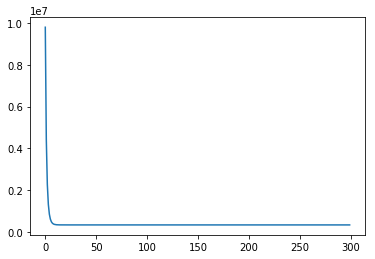

In [12]:
plt.plot(losses)
plt.show()

In [13]:
theta

array([ 4.99096674, 29.68187118, 92.66247759,  8.28062089, 44.76773522,
        2.51916121])

Importing LinearRegression from Scikit Learn, <br>
I have also implemented Linear Regression from scratch. <br>
Implementation is in Github.

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
lr = LinearRegression()

In [16]:
lr.fit(X,Y)
print(lr.coef_)
print(lr.intercept_)

[ 0.         29.68187118 92.66247759  8.28062089 44.76773522  2.51916121]
4.990966736872126


In [17]:
test = readData("Test.csv")

In [18]:
ones = np.ones([test.shape[0],1])
test = np.concatenate((ones,test),axis=1)

In [19]:
predictions=[]

for i in range(test.shape[0]):
    predictions.append((hypothesis(theta,test[i])))

In [20]:
predictions=np.array(predictions)
print(predictions.shape)

(400,)


In [21]:
id= np.arange(predictions.shape[0], dtype="float32")

In [22]:
result=np.stack((id,predictions),axis=1)

In [23]:
result_df=pd.DataFrame(result,columns=["Id","target"])

In [24]:
result_df.to_csv("result.csv",index=False)

After gaining the result, I exported it to ```result.csv``` file.